In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
dataset.shape

(583, 11)

In [4]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (554, 11)
Unseen Data For Predictions: (29, 11)


In [6]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [8]:
exp_clf101 = setup(data = data, target = 'Dataset', session_id=123) 

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(554, 11)"
5,Transformed data shape,"(554, 11)"
6,Transformed train set shape,"(387, 11)"
7,Transformed test set shape,"(167, 11)"
8,Ordinal features,1
9,Numeric features,9


In [9]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7211,0.7525,0.2432,0.5754,0.3236,0.1839,0.2169,1.0120
lda,Linear Discriminant Analysis,0.7183,0.7182,0.1712,0.5783,0.2485,0.1339,0.1755,0.0690
ridge,Ridge Classifier,0.7155,0.0000,0.1167,0.4200,0.1743,0.0908,0.1186,0.0470
dummy,Dummy Classifier,0.7132,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0680
rf,Random Forest Classifier,0.6745,0.6992,0.2439,0.4085,0.2912,0.1043,0.1136,0.2580
et,Extra Trees Classifier,0.6744,0.7274,0.2341,0.3970,0.2858,0.0965,0.1046,0.2300
gbc,Gradient Boosting Classifier,0.6720,0.6880,0.2621,0.3601,0.2959,0.1031,0.1016,0.1870
ada,Ada Boost Classifier,0.6642,0.6843,0.3341,0.3987,0.3609,0.1376,0.1388,0.1560
lightgbm,Light Gradient Boosting Machine,0.6642,0.6829,0.3167,0.4019,0.3453,0.1298,0.1329,0.2450
knn,K Neighbors Classifier,0.6568,0.6409,0.2530,0.3717,0.2964,0.0808,0.0858,0.0690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Create a Model

lr = create_model('lr') # from the table above, we can see that LogisticRegression works the best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7436,0.9318,0.0909,1.0000,0.1667,0.1256,0.2588
1,0.6410,0.5292,0.0909,0.2000,0.1250,-0.0623,-0.0699
2,0.7949,0.8279,0.3636,0.8000,0.5000,0.3930,0.4414
3,0.6923,0.7955,0.1818,0.4000,0.2500,0.0895,0.1005
4,0.6923,0.7338,0.3636,0.4444,0.4000,0.1959,0.1977
5,0.7179,0.7175,0.1818,0.5000,0.2667,0.1368,0.1637
6,0.7179,0.7068,0.2500,0.6000,0.3529,0.2099,0.2429
7,0.7368,0.7374,0.1818,0.6667,0.2857,0.1845,0.2435
8,0.6316,0.6970,0.1818,0.2857,0.2222,-0.0038,-0.0039


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Tune a Model

tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7436,0.9026,0.0909,1.0000,0.1667,0.1256,0.2588
1,0.6154,0.5552,0.0000,0.0000,0.0000,-0.1771,-0.2119
2,0.7949,0.8377,0.4545,0.7143,0.5556,0.4307,0.4492
3,0.6923,0.7987,0.2727,0.4286,0.3333,0.1460,0.1523
4,0.6923,0.7208,0.3636,0.4444,0.4000,0.1959,0.1977
5,0.7692,0.7370,0.1818,1.0000,0.3077,0.2419,0.3709
6,0.6923,0.6698,0.1667,0.5000,0.2500,0.1136,0.1409
7,0.7105,0.7340,0.1818,0.5000,0.2667,0.1328,0.1592
8,0.6579,0.7239,0.1818,0.3333,0.2353,0.0389,0.0419


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


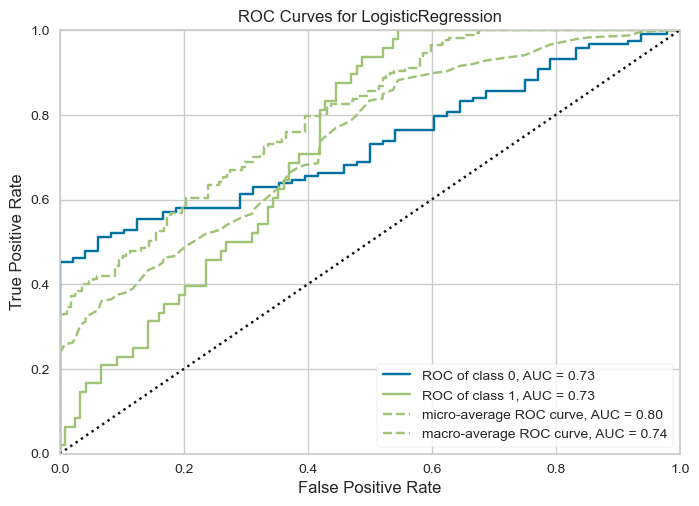

In [12]:
# Plotting Metrix
# ROC
plot_model(tuned_lr, plot = 'auc')

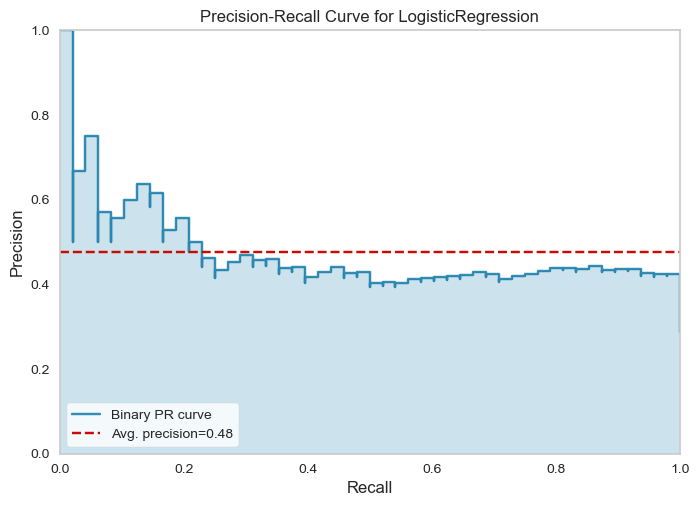

In [13]:
# Precision Recall curve
plot_model(tuned_lr, plot = 'pr')

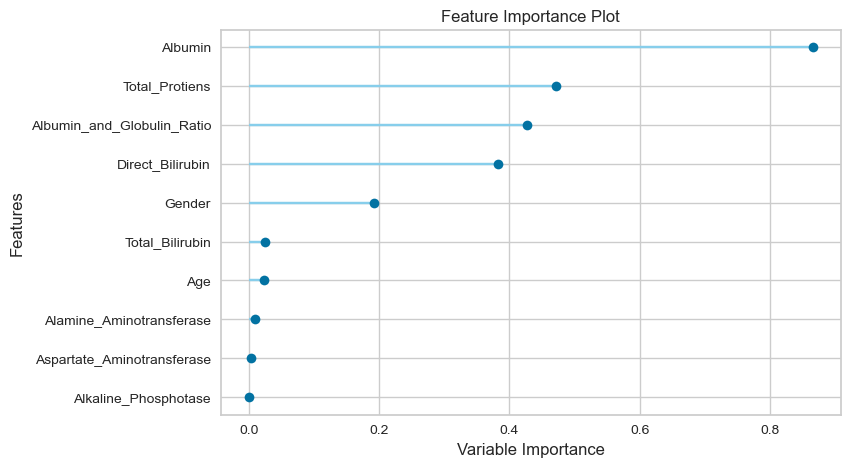

In [14]:
# Feature Importance Plot
plot_model(tuned_lr, plot='feature')

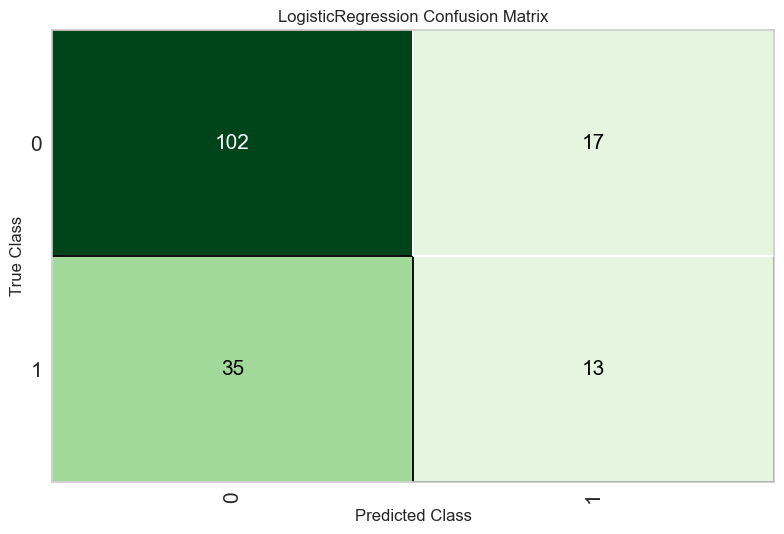

In [15]:
# Confusion Metrix

plot_model(tuned_lr, plot = 'confusion_matrix')

In [16]:
# Evaluate model

evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6886,0.7320,0.2708,0.4333,0.3333,0.1441,0.1509


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
32,55,Male,0.900000,0.2,116,36,16,6.2,3.2,1.00,1,1,0.6154
137,20,Female,16.700001,8.4,200,91,101,6.9,3.5,1.02,0,1,0.9813
157,65,Male,7.900000,4.3,282,50,72,6.0,3.0,1.00,0,1,0.9502
258,48,Female,1.000000,0.3,310,37,56,5.9,2.5,0.70,0,1,0.6812
271,65,Female,1.000000,0.3,202,26,13,5.3,2.6,0.90,1,1,0.6331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,31,Male,1.300000,0.5,184,29,32,6.8,3.4,1.00,0,1,0.5454
269,36,Male,0.800000,0.2,158,29,39,6.0,2.2,0.50,1,1,0.6511
386,12,Male,0.800000,0.2,302,47,67,6.7,3.5,1.10,1,2,0.5262
218,56,Male,1.000000,0.3,195,22,28,5.8,2.6,0.80,1,1,0.6749


In [18]:
# Predict on test data

unseen_predictions = predict_model(tuned_lr, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9310,0.9200,0.5000,1.0000,0.6667,0.6329,0.6804


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
0,73,Male,1.8,0.9,220,20,43,6.5,3.0,0.8,0,1,0.8022
1,55,Male,0.8,0.2,290,139,87,7.0,3.0,0.7,0,1,0.9043
2,51,Male,0.7,0.1,180,25,27,6.1,3.1,1.0,0,1,0.5849
3,51,Male,2.9,1.2,189,80,125,6.2,3.1,1.0,0,1,0.8503
4,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.1,0,1,0.9971


In [19]:
# Save model

save_model(tuned_lr,'tuned_lr_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\joysi\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Aspart...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64}],
                                                              

In [20]:
# Create a Model

dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5128,0.4123,0.1818,0.1667,0.1739,-0.1706,-0.1709
1,0.6154,0.5114,0.2727,0.3000,0.2857,0.0234,0.0234
2,0.7179,0.6104,0.3636,0.5000,0.4211,0.2407,0.2460
3,0.5897,0.4659,0.1818,0.2222,0.2000,-0.0722,-0.0728
4,0.6667,0.5471,0.2727,0.3750,0.3158,0.1027,0.1049
5,0.5897,0.4935,0.2727,0.2727,0.2727,-0.0130,-0.0130
6,0.6154,0.5602,0.4167,0.3846,0.4000,0.1176,0.1179
7,0.7105,0.6616,0.5455,0.5000,0.5217,0.3148,0.3154
8,0.7105,0.6616,0.5455,0.5000,0.5217,0.3148,0.3154


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# Tune a Model

tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7179,0.7403,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7179,0.5065,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7179,0.7679,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7179,0.6769,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7179,0.6429,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7179,0.6851,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6923,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7105,0.6414,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7105,0.7593,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
# Evaluate model

evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…